In [1]:
import cv2, os
import numpy as np
from keras import utils,layers,models,optimizers
from keras.utils import plot_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from keras.layers import Dense,Dropout,Activation,Flatten
import seaborn as sn
import tensorflow as tf
import keras
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_path="../data/images/train"
val_path="../data/images/validation"
train_data_list= os.listdir(train_path)
val_data_list= os.listdir(val_path)

In [3]:
train_data_list

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [4]:
# def Data_prepare(data_list,path):
#   img_data=[]
#   for dataset in data_list:
#     img_list=os.listdir(path + "/" + dataset)
#     subfolder_path = os.path.join(path, dataset)
#     num_items = len([item for item in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, item))])
#     print(f"Loading The images from the folder {dataset}, {num_items} images")
#     for img in img_list:
#       input_img= cv2.imread(path+"/"+dataset+"/"+img)
#       input_img_resized= cv2.resize(input_img,(96,96))
#       img_data.append(input_img_resized)
#   data=np.array(img_data)
#   data=data.astype("float32")
#   data=data/255.0
#   return data

In [5]:
import os
import cv2
import numpy as np

def Data_prepare(data_list, path, max_images):
    img_data = []
    for dataset in data_list:
        img_list = os.listdir(os.path.join(path, dataset))
        subfolder_path = os.path.join(path, dataset)
        num_items = len([item for item in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, item))])
        count = 0
        for img in img_list:
            if count >= max_images:
                print(f"Loading The images from the folder {dataset}, {count} images")
                break
            input_img = cv2.imread(os.path.join(path, dataset, img))
            input_img_resized = cv2.resize(input_img, (96, 96))
            img_data.append(input_img_resized)
            count += 1
    data = np.array(img_data)
    data = data.astype("float32")
    data = data / 255.0
    return data


In [6]:
max_images =3000
train_data=Data_prepare(train_data_list,train_path, max_images)

Loading The images from the folder angry, 3000 images
Loading The images from the folder fear, 3000 images
Loading The images from the folder happy, 3000 images
Loading The images from the folder neutral, 3000 images
Loading The images from the folder sad, 3000 images
Loading The images from the folder surprise, 3000 images


In [7]:
max_images = 110
val_data=Data_prepare(val_data_list,val_path, max_images)

Loading The images from the folder angry, 110 images
Loading The images from the folder disgust, 110 images
Loading The images from the folder fear, 110 images
Loading The images from the folder happy, 110 images
Loading The images from the folder neutral, 110 images
Loading The images from the folder sad, 110 images
Loading The images from the folder surprise, 110 images


In [8]:
num_classes= 7
num_train_samples=train_data.shape[0]
num_val_samples=val_data.shape[0]
print(f"Train data shape :{train_data.shape}")
print(f"Validation data shape :{val_data.shape}")

Train data shape :(18436, 96, 96, 3)
Validation data shape :(770, 96, 96, 3)


In [9]:
# One hot vector -> Labels
train_labels=np.ones((num_train_samples,),dtype="int64")
train_labels[0:3205] = 0 # -> Surprise
train_labels[3205:7308] = 1 # -> Fear
train_labels[7308:11301] = 2 # -> Angry
train_labels[11301:16283] = 3 # -> Netural
train_labels[16283:21221] = 4 # -> Sad
train_labels[21221:21657] = 5 # -> Disgust
train_labels[21657:28821] = 6 # -> Happy
img_train_labels=utils.to_categorical(train_labels,num_classes)


val_labels=np.ones((num_val_samples,),dtype="int64")
val_labels[0:797] = 0 # -> Surprise
val_labels[797:1815] = 1 # -> Fear
val_labels[1815:2775] = 2 # -> Angry
val_labels[2775:3991] = 3 # -> Netural
val_labels[3991:5130] = 4 # -> Sad
val_labels[5130:5214] = 5 # -> Disgust
val_labels[5214:7066] = 6 # -> Happy
img_val_labels=utils.to_categorical(val_labels,num_classes)

In [10]:
img_train_labels[12000]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [11]:
# Shuffle
X_train,Y_train=shuffle(train_data,img_train_labels,random_state=5)
X_test,Y_test=shuffle(val_data,img_val_labels,random_state=5)

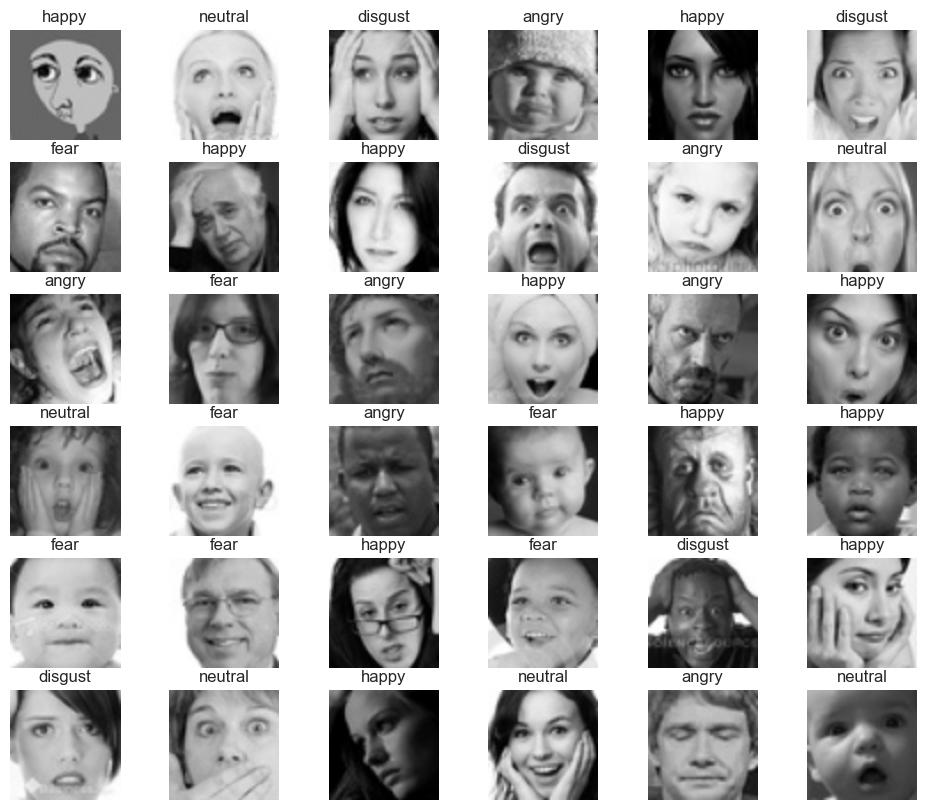

In [12]:
plt.figure(figsize=(12,10))
for i,j in enumerate(list(np.random.randint(0,len(X_train),36))): # index,item
  plt.subplot(6,6,i+1)
  plt.imshow(X_train[j])
  plt.axis("off")
  plt.title(train_data_list[list(Y_train[j].astype(int)).index(1)])

In [13]:
# MobileNetV2_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
# MobileNetV2_model.summary()

In [14]:
model = models.Sequential()
# model.add(MobileNetV2_model)
model.add(layers.Flatten(input_shape=(96, 96, 3)))
layers.Dropout(0.4)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
layers.Dropout(0.25)
model.add(layers.Dense(64, activation='relu'))
layers.Dropout(0.25)
model.add(layers.Dense(7, activation='softmax'))

In [26]:
model.summary()

In [28]:

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'],
            )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 47, 47, 16)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 47, 47, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 22, 22, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 22, 22, 32)       

In [29]:
model.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test))

In [30]:
# # Saving the model
# model.save("my_model.h5")
# model.save("my_model.keras")

Epoch 1/10
577/577 [==============================] - 44s 74ms/step - loss: 1.5917 - accuracy: 0.2610 - val_loss: 1.6138 - val_accuracy: 0.0909
Epoch 2/10
577/577 [==============================] - 38s 66ms/step - loss: 1.5138 - accuracy: 0.3070 - val_loss: 1.7727 - val_accuracy: 0.0364
Epoch 3/10
577/577 [==============================] - 34s 59ms/step - loss: 1.4844 - accuracy: 0.3231 - val_loss: 1.6579 - val_accuracy: 0.1208
Epoch 4/10
577/577 [==============================] - 17s 29ms/step - loss: 1.4642 - accuracy: 0.3383 - val_loss: 1.8478 - val_accuracy: 0.0442
Epoch 5/10
577/577 [==============================] - 22s 38ms/step - loss: 1.4394 - accuracy: 0.3548 - val_loss: 1.9149 - val_accuracy: 0.0468
Epoch 6/10
577/577 [==============================] - 18s 32ms/step - loss: 1.4131 - accuracy: 0.3697 - val_loss: 1.8944 - val_accuracy: 0.0987
Epoch 7/10
577/577 [==============================] - 17s 30ms/step - loss: 1.3845 - accuracy: 0.3872 - val_loss: 1.7832 - val_accuracy:

In [19]:
y_pred = model.predict(X_test)
y_pred_labels=[np.argmax(element) for element in y_pred]#returns the index of the highest probability.
y_test_labels=[np.argmax(element) for element in Y_test]
cm = tf.math.confusion_matrix(labels=y_test_labels,predictions=y_pred_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

25/25 [==============================] - 0s 13ms/step


Text(95.72222222222221, 0.5, 'Truth')

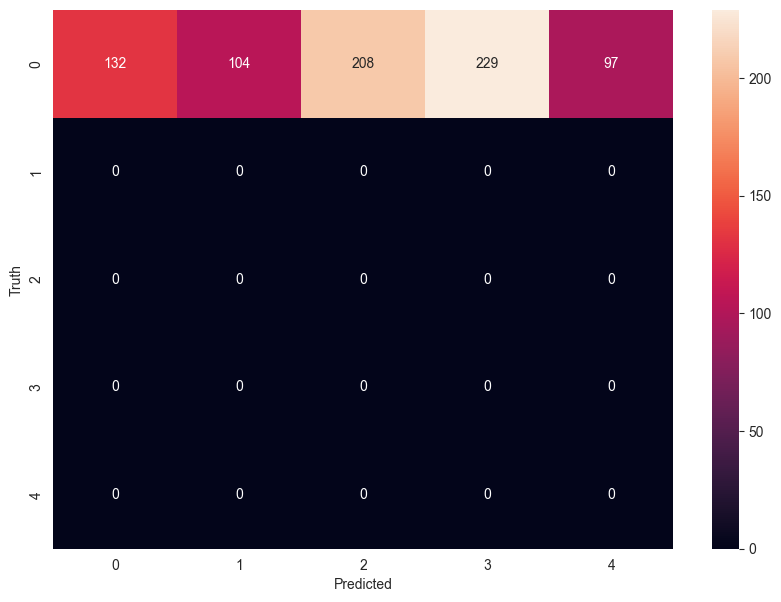

In [31]:
from sklearn.metrics import accuracy_score

# Assuming y_test_labels and y_pred_labels are available
accuracy = accuracy_score(y_test_labels, y_pred_labels)

print(f'Accuracy: {accuracy * 100:.2f}%')
# Assuming you have a trained model named 'model' and a test dataset (X_test)
y_pred_probabilities = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

In [32]:
from IPython.display import clear_output
import time

label_to_text = {0:'Surprise', 1:'Fear', 2:'Angry', 3:'Neutral', 4: 'Sad', 5: 'Disgust', 6: 'Happy'}
num_images_to_display = 10
display_time = 3
random_indices = np.random.choice(len(X_test), num_images_to_display, replace=False)

for i in random_indices:
    # Display the image
    plt.imshow(X_test[i])  
    plt.axis('off')
    plt.show()

    # Output predicted and actual labels
    print(f"Predicted: {label_to_text[y_pred_labels[i]]}, Actual: {label_to_text[y_test_labels[i]]}")

    # Wait for a few seconds before displaying the next image
    time.sleep(display_time)
    
    # Clear the output to show the next image cleanly
    clear_output(wait=True)

Accuracy: 17.14%
25/25 [==============================] - 0s 9ms/step


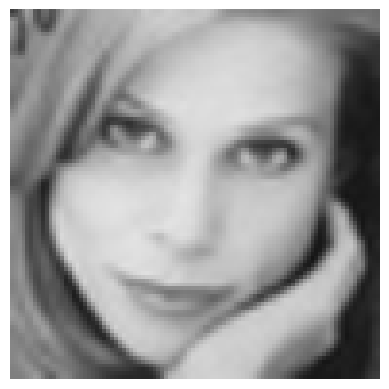

Predicted: Sad, Actual: Surprise


In [22]:
from IPython.display import clear_output
import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def preprocess_image_for_mobilenet_v2(image_path, target_size=(96, 96)):
    img = Image.open(image_path)
    # Resize the image to the target size
    img = img.resize(target_size, resample=Image.LANCZOS)

    # Convert PIL image to NumPy array
    img_array = np.array(img)

    # If the image is grayscale, repeat the channel to create an RGB image
    if len(img_array.shape) == 2:
        img_array = np.repeat(img_array[:, :, np.newaxis], 3, axis=-1)

    # Preprocess the image for MobileNetV2
    img_array = preprocess_input(img_array)

    return img_array

label_to_text = {0: 'Surprise', 1: 'Fear', 2: 'Angry', 3: 'Neutral', 4: 'Sad', 5: 'Disgust', 6: 'Happy'}
num_images_to_display = 30
display_time = 3

# Load your trained model (replace 'YourModel.h5' with your actual model file)
model = load_model('best_model.h5')
# model = load_model('my_model.h5')

# Insert the path to the image you want to predict
image_path = "img.png"

# Preprocess the image for prediction
image = preprocess_image_for_mobilenet_v2(image_path)  # You can use the previously defined preprocessing function

# Make predictions using the model
prediction = model.predict(np.expand_dims(image, axis=0))

# Get the predicted label
predicted_label = label_to_text[np.argmax(prediction)]

# Display the image
plt.imshow(image) 
plt.axis('off')
plt.show()

# Output predicted label
print(f"Predicted: {predicted_label}")

# Wait for a few seconds before clearing the output
time.sleep(display_time)
clear_output(wait=True)
